### LITTLE EYES
#### Meu Primeiro Modelo de Visão Computacional

In [243]:
digit_size = (28, 28, 1)

In [244]:
import tensorflow
from tensorflow.keras import datasets, layers, models, optimizers
from matplotlib import pyplot

### Data Preparation

In [245]:
(train_images, train_labels), (validation_images, validation_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, validation_images = train_images / 255.0, validation_images / 255.0

In [246]:
train_images.shape, validation_images.shape

((60000, 28, 28), (10000, 28, 28))

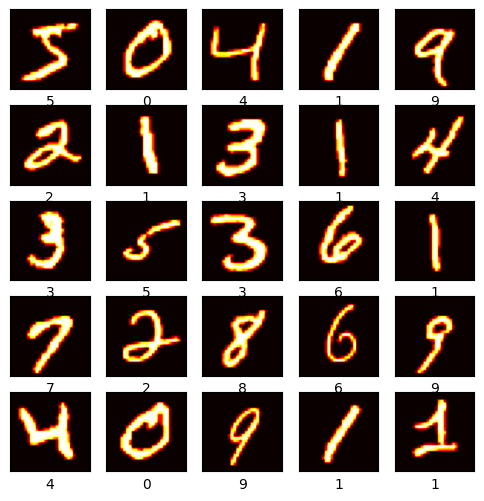

In [247]:
class_names = ['0', '1', '2', '3', '4', '5',
                '6', '7', '8', '9']

pyplot.figure(figsize=(6,6))
for i in range(25):
    pyplot.subplot(5,5,i+1)
    pyplot.xticks([])
    pyplot.yticks([])
    pyplot.grid(False)
    pyplot.imshow(train_images[i], cmap="hot")
    pyplot.xlabel(class_names[train_labels[i]])
pyplot.show()

### Modeling

#### API SEQUENCIAL

In [248]:
model = models.Sequential()
model.add(layers.Conv2D(2, (3, 3), activation='relu', input_shape=digit_size))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(4, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(4, (3, 3), activation='relu'))

In [249]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_63 (Conv2D)          (None, 26, 26, 2)         20        
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 13, 13, 2)        0         
 g2D)                                                            
                                                                 
 conv2d_64 (Conv2D)          (None, 11, 11, 4)         76        
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 5, 5, 4)          0         
 g2D)                                                            
                                                                 
 conv2d_65 (Conv2D)          (None, 3, 3, 4)           148       
                                                                 
Total params: 244
Trainable params: 244
Non-trainable

In [250]:
model.add(layers.Flatten())
model.add(layers.Dense(2, activation='relu'))
model.add(layers.Dense(10))

In [251]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_63 (Conv2D)          (None, 26, 26, 2)         20        
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 13, 13, 2)        0         
 g2D)                                                            
                                                                 
 conv2d_64 (Conv2D)          (None, 11, 11, 4)         76        
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 5, 5, 4)          0         
 g2D)                                                            
                                                                 
 conv2d_65 (Conv2D)          (None, 3, 3, 4)           148       
                                                                 
 flatten_20 (Flatten)        (None, 36)              

In [252]:
opt = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt ,
              loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(validation_images, validation_labels))

Epoch 1/20
1875/1875 [==============================] - 9s 5ms/step - loss: 1.6842 - accuracy: 0.3180 - val_loss: 1.5482 - val_accuracy: 0.3852
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 1.3275 - accuracy: 0.4840 - val_loss: 0.9098 - val_accuracy: 0.6692
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8320 - accuracy: 0.7132 - val_loss: 0.7848 - val_accuracy: 0.7263
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7636 - accuracy: 0.7428 - val_loss: 0.7157 - val_accuracy: 0.7618
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6982 - accuracy: 0.7746 - val_loss: 0.6330 - val_accuracy: 0.7999
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6534 - accuracy: 0.7988 - val_loss: 0.6065 - val_accuracy: 0.8181
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6349 - accuracy: 0.8102 - val_loss: 0.5889 - val_accuracy:

313/313 - 1s - loss: 0.5250 - accuracy: 0.8503 - 580ms/epoch - 2ms/step


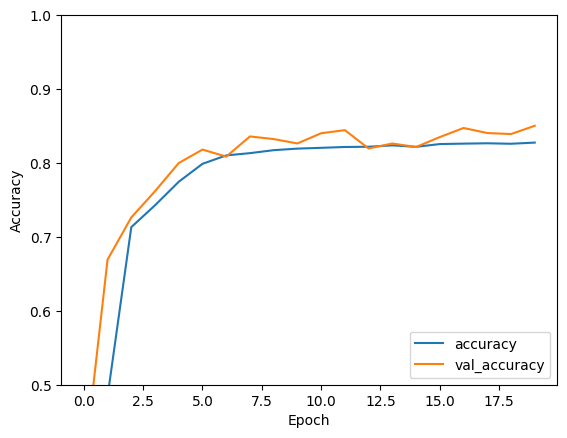

In [253]:
pyplot.plot(history.history['accuracy'], label='accuracy')
pyplot.plot(history.history['val_accuracy'], label = 'val_accuracy')
pyplot.xlabel('Epoch')
pyplot.ylabel('Accuracy')
pyplot.ylim([0.5, 1])
pyplot.legend(loc='lower right')

validation_loss, validation_acc = model.evaluate(validation_images,  validation_labels, verbose=2)